### Student Information
Name: Wei-Fang Liu

Student ID: 1121092S

GitHub ID: anpanvann

Kaggle name: weifangfang

Kaggle private scoreboard snapshot:

[Snapshot](pics/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

---

## Data Preparation

In [1]:
import pandas as pd

### Load Data

In [2]:
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


### `Exercise 1`:
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

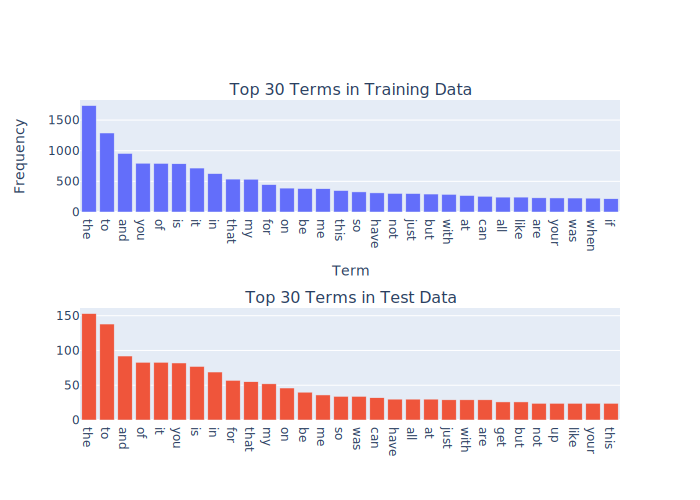

In [3]:
# Answer here

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

pio.renderers.default = 'svg'
pio.renderers['svg'].engine = 'kaleido'

count_vect = CountVectorizer()
train_count = count_vect.fit_transform(train_df.text) 
train_term_frequencies = np.asarray(train_count.sum(axis=0))[0]

count_vect_test = CountVectorizer()
test_count = count_vect_test.fit_transform(test_df.text) 
test_term_frequencies = np.asarray(test_count.sum(axis=0))[0]

train_data = {
    'Term': count_vect.get_feature_names_out(),
    'Frequency': train_term_frequencies
}
train_df_freq = pd.DataFrame(train_data).sort_values(by='Frequency', ascending=False).reset_index(drop=True)
top_train_features = train_df_freq[:30]

test_data = {
    'Term': count_vect_test.get_feature_names_out(),
    'Frequency': test_term_frequencies
}
test_df_freq = pd.DataFrame(test_data).sort_values(by='Frequency', ascending=False).reset_index(drop=True)
top_test_features = test_df_freq[:30]

fig = make_subplots(rows=2, cols=1, vertical_spacing=0.3,
                    subplot_titles=("Top 30 Terms in Training Data", 
                                    "Top 30 Terms in Test Data"))

fig.add_trace(
    go.Bar(x=top_train_features['Term'], y=top_train_features['Frequency']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=top_test_features['Term'], y=top_test_features['Frequency']),
    row=2, col=1
)

fig.update_layout(
    xaxis=dict(title='Term'),
    yaxis=dict(title='Frequency'),
    showlegend=False
)

fig.show()


### Save Data

In [4]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [5]:
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

### Exploratory Data Analysis

In [6]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

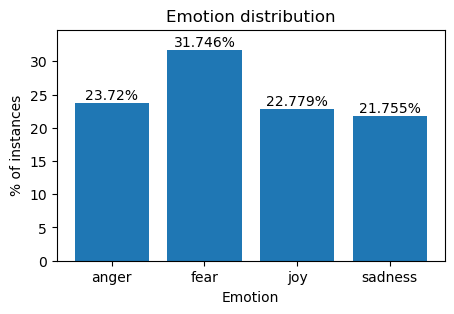

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total, 3))

# Plot
fig, ax = plt.subplots(figsize=(5, 3))
bars = plt.bar(df1.index, df1.values)

# Arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')

# Set the y-axis range to be from 0 to a value higher than the highest value in df1.values
plt.ylim([0, max(df1.values) + 3])

# Adding the text on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval}%', ha='center', va='bottom')

plt.show()


- - -

## Feature Engineering

### Bag of Words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
BOW_vectorizer = CountVectorizer() 
BOW_vectorizer.fit(train_df['text'])
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [10]:
train_data_BOW_features.toarray()
feature_names = BOW_vectorizer.get_feature_names_out()


In [11]:
import nltk

nltk.download('punkt')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt to /Users/vvnliu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/vvnliu/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(3613, 500)

In [12]:
train_data_BOW_features_500.toarray()

feature_names_500 = BOW_500.get_feature_names_out()

"😂" in feature_names_500

True

### `Exercise 2` (Take home):
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
tfidf_vectorizer.fit(train_df['text'])
train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])

feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()[100:110]
print(feature_names_tfidf)

['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling']


## Model

### Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

DT_model = DecisionTreeClassifier(random_state=1)
DT_model = DT_model.fit(X_train, y_train)

y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)
y_test_pred[:10]

array(['fear', 'fear', 'anger', 'fear', 'joy', 'fear', 'anger', 'anger',
       'anger', 'anger'], dtype=object)

### Results Evaluation

In [16]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [18]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

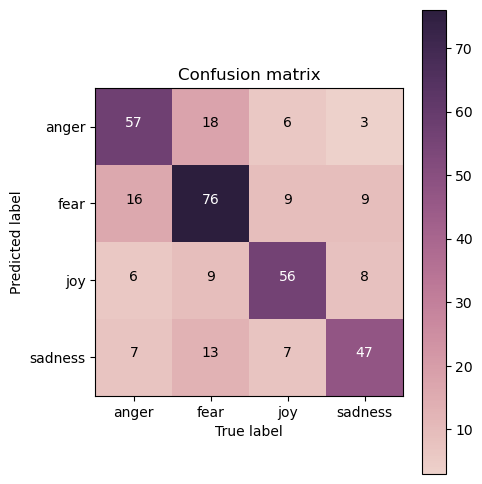

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### `Exercise 3` (Take Home):
Can you interpret the results above? What do they mean?

- The **high** training accuracy (99%) compared to the testing accuracy (68%) suggests that the model might be overfitting to the training data. Overfitting occurs when a model learns the training data too well, including its noise and fluctuations, but does not perform well on unseen data.

- The balanced F1-scores across different emotions indicate that the model **does not heavily favor one class over another** in terms of its predictive performance.

- The differences in precision and recall for each class indicate that the **model's ability to correctly identify each emotion** varies. For instance, it might be slightly better at identifying 'joy' (with higher precision and recall) compared to other emotions.

### `Exercise 4` (Take Home):
Build a model using Naive Bayes model and train it. What are the testing results?

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

model = MultinomialNB()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.697

Classification Report:
               precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



### `Exercise 5` (Take Home):

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

- The Naive Bayes model has a slightly higher testing accuracy than the Decision Tree model.
- The Decision Tree model appears to be overfitting, as indicated by the high training accuracy (0.99) compared to the testing accuracy (0.68).
- Both models have similar precision, recall, and F1-scores on the testing set, but Naive Bayes is marginally better.

    **Naive Bayes** assumes that all features are independent of each other, which can be a strong and sometimes unrealistic assumption, but it often works well in practice for classification, especially in text-related tasks or where features are indeed conditionally independent given the class.

    The **Decision Tree** model, on the other hand, makes no such assumption about feature independence. It creates a tree-like model of decisions, which can capture complex relationships between features. However, it is prone to overfitting, especially if the tree is allowed to grow without constraints or proper pruning. This seems to be the case here, as indicated by the high training accuracy compared to testing accuracy, suggesting that the model has learned the training data too well, including its noise and outliers, and thus does not generalize as well to unseen data.

## Deep Learning

### Data Preparation

In [21]:
import keras

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\nBefore convert')
print('y_train[0:4]:\n', y_train[0:4])

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\nAfter convert')
print('y_train[0:4]:\n', y_train[0:4])

/Users/vvnliu/miniconda3/envs/tensorflow/lib/python3.10/site-packages/h5py/__init__.py:36: UserWarning:

h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems



check label:  ['anger' 'fear' 'joy' 'sadness']

Before convert
y_train[0:4]:
 1986     fear
72      anger
161     anger
533     anger
Name: emotion, dtype: object


After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [22]:
input_shape = X_train.shape[1] # number of features
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


### Model Construction

In [23]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0     

2023-12-31 02:04:40.842638: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-31 02:04:40.842663: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-12-31 02:04:40.842669: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-12-31 02:04:40.843175: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-31 02:04:40.843657: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [24]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('data/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


2023-12-31 02:04:41.281507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 5s 36ms/step - loss: 1.3190 - accuracy: 0.3836 - val_loss: 1.2803 - val_accuracy: 0.4323
Epoch 2/25
113/113 [==============================] - 3s 27ms/step - loss: 0.9800 - accuracy: 0.6623 - val_loss: 0.9182 - val_accuracy: 0.6599
Epoch 3/25
113/113 [==============================] - 3s 28ms/step - loss: 0.5829 - accuracy: 0.7930 - val_loss: 0.7685 - val_accuracy: 0.6916
Epoch 4/25
113/113 [==============================] - 3s 27ms/step - loss: 0.4227 - accuracy: 0.8403 - val_loss: 0.7638 - val_accuracy: 0.6830
Epoch 5/25
113/113 [==============================] - 3s 27ms/step - loss: 0.3369 - accuracy: 0.8810 - val_loss: 0.8272 - val_accuracy: 0.6744
Epoch 6/25
113/113 [==============================] - 3s 28ms/step - loss: 0.2773 - accuracy: 0.9040 - val_loss: 0.8706 - val_accuracy: 0.6686
Epoch 7/25
113/113 [==============================] - 3s 28ms/step - loss: 0.2320 - accuracy: 0.9233 - val_loss: 0.9716 - val_accuracy: 0.6599
Epoch 8/25

In [25]:
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

3/3 [==============================] - 0s 43ms/step
testing accuracy: 0.67


### `Exercise 6` (Take Home):

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

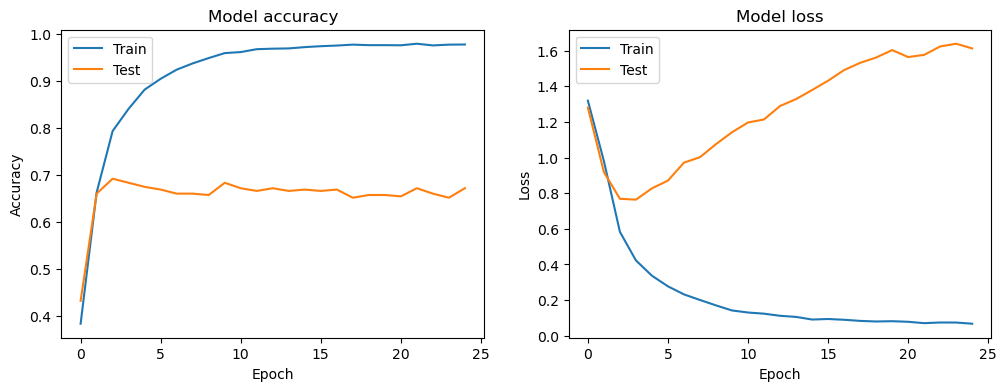

In [26]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from the fit function
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

as the training epoch increases, 
- the training accuracy approaches 1 and the training loss approaches 0,
- the testing accuracy stays around 0.7, and the testing loss increases from 0.8 to 1.6.

this implies that the model is overfitted to the training data (can almost get the correct answer for every training input) that it is not able to perform well on unseen data.

## Word2Vector

### Train Our Model

In [27]:
import gensim

import warnings
warnings.filterwarnings('ignore')

train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
training_corpus = train_df['text_tokenized'].values

In [28]:
from gensim.models import Word2Vec

vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [29]:
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('Be', 0.9305508136749268),
 ('pls', 0.9212601184844971),
 ('.\\nA', 0.9142490029335022),
 ('birthday', 0.9103347659111023),
 ('help', 0.9056568741798401),
 ('bday', 0.9055968523025513),
 ('cats', 0.9053031802177429),
 ("'you", 0.9014285802841187),
 ('blessed', 0.8990411162376404),
 ('O', 0.8985546231269836)]

### Pre-Trained W2V Model

#### Gensim API

In [30]:
import gensim.downloader as api

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.9336148500442505),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158350825309753),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248763084412),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

### `Exercise 7` (Take Home):

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

- **Averaging Word Vectors**: Compute the average of the word vectors for each word in the sentence. This method is simple and effective for various tasks but may lose important information about word order and context.
- **Weighted Averaging** (e.g., TF-IDF Weighting): Instead of giving each word equal importance, you can weight the word vectors by the importance of each word in the sentence. This can be done using TF-IDF scores to give less weight to common words and more weight to important ones.
- **Convolutional Neural Networks** (CNNs): CNNs can be used to extract higher-level features from sequences of word vectors. By using filters and pooling operations, CNNs can capture local patterns in the data.
- **Attention Mechanisms**: Models with attention mechanisms can focus on different parts of a sentence to derive meaning, which is particularly useful for tasks like translation or summarization.




## k-Means Clustering

In [31]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

In [32]:
from sklearn.cluster import KMeans

k = 2
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

cluster_result = kmeans_model.labels_
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


## High-Dimension Visualization: t-SNE

In [33]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "data/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


### Plot Using t-SNE (2D)

### `Exercise 8` (Take Home):

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [34]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']


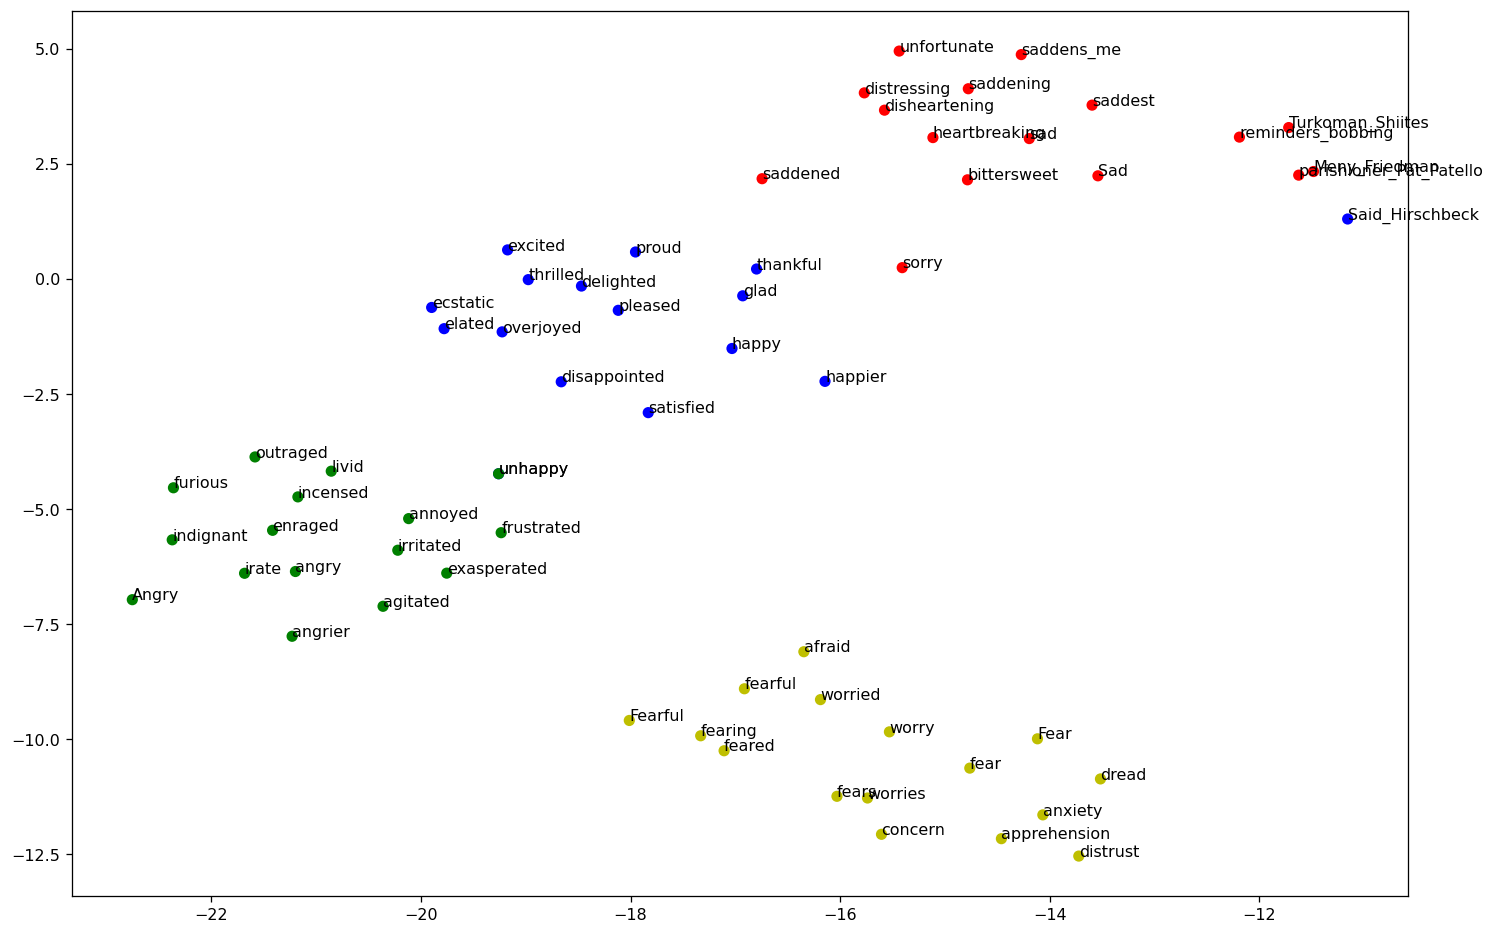

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(15, 10), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()